<a href="https://colab.research.google.com/github/Adeyinka-hub/MY-MACHINE-LEARNING-AND-DEEP-LEARNING-WORKS-ON-KAGGLE-AND-ZINDI-RESPECTIVELY/blob/master/UmojaHack_Nigeria_AXA_Vehicle_Insurance_Claim_Challenge_by_UmojaHack_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [576]:
seed= 42 
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed)

# Import libraries 

In [577]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Read data 

In [578]:
train = pd.read_csv('/content/Train_dsn_umoja.csv')
test = pd.read_csv('/content/Test_dsn_umoja.csv')
ss = pd.read_csv('/content/SampleSubmission_dsn_umoja.csv')
#variable_def = pd.read_csv('../input/umojahack/VariableDefinitions_-_Sheet1.csv')

# Simple EDA

In [579]:
for i in train.columns:
    print(train[i].value_counts())

WE4MMXG    1
1Z9E2YP    1
UIM0DQ2    1
SQ04SY9    1
8B7RCA5    1
          ..
DX07XYO    1
YJ2AD91    1
NNL1UZB    1
USYQU82    1
NNE7WJK    1
Name: ID, Length: 12079, dtype: int64
2010-03-27    89
2010-12-23    79
2010-07-05    79
2010-02-26    78
2010-10-31    72
              ..
2007-03-04     1
2005-08-05     1
2010-06-09     1
2009-08-29     1
2001-12-11     1
Name: Policy Start Date, Length: 376, dtype: int64
2010-12-31    169
2011-03-26     99
2011-02-25     77
2011-04-17     74
2011-02-27     72
             ... 
2012-01-20      1
2012-01-01      1
2034-05-20      1
2016-06-25      1
2016-09-06      1
Name: Policy End Date, Length: 372, dtype: int64
Male            7617
Female          3327
Entity           277
Joint Gender     223
NOT STATED       175
NO GENDER         66
SEX               35
Name: Gender, dtype: int64
 40      821
 50      628
 41      491
 36      486
 38      472
        ... 
 112       1
 128       1
 90        1
-22        1
-6099      1
Name: Age, Length

In [580]:
train.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [581]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
3,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
4,02BYET3,2010-09-16,2010-12-31,NaN,120,2010-09-16,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve


In [582]:
ss.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [583]:
#variable_def

In [584]:
print('Train shape:',train.shape,'\nTest shape:', test.shape, '\nsamplesubmission shape:',ss.shape)

Train shape: (12079, 14) 
Test shape: (5177, 13) 
samplesubmission shape: (5177, 2)


In [585]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [586]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      5177 non-null   object
 1   Policy Start Date       5177 non-null   object
 2   Policy End Date         5177 non-null   object
 3   Gender                  5021 non-null   object
 4   Age                     5177 non-null   int64 
 5   First Transaction Date  5177 non-null   object
 6   No_Pol                  5177 non-null   int64 
 7   Car_Category            3539 non-null   object
 8   Subject_Car_Colour      2172 non-null   object
 9   Subject_Car_Make        4116 non-null   object
 10  LGA_Name                2395 non-null   object
 11  State                   2389 non-null   object
 12  ProductName             5177 non-null   object
dtypes: int64(2), object(11)
memory usage: 525.9+ KB


In [587]:
index_to_use_later = test['ID'].values

# Since the ratio of categorical variables to numerical variable is high, consider combining both train and test for easy preproccessing 

In [588]:
# join train and test together
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (17256, 14)


In [589]:
all_data.tail()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
17251,ZYXX5AF,2010-07-18,2011-07-17,Male,48,2010-07-18,1,Saloon,NaN,Honda,NaN,NaN,CarSafe,NaN
17252,ZYYOZ5L,2010-12-04,2011-12-03,NaN,50,2010-12-04,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic,NaN
17253,ZZ1GTKD,2010-09-24,2011-09-23,Male,1,2010-09-24,1,NaN,NaN,NaN,NaN,NaN,CarSafe,NaN
17254,ZZDXQSI,2010-07-17,2011-07-16,Female,52,2010-07-17,1,Saloon,Grey,TOYOTA,NaN,NaN,Car Classic,NaN
17255,ZZYTLV1,2010-07-17,2011-07-16,Male,68,2010-07-17,1,Saloon,NaN,Peugeot,NaN,NaN,CarSafe,NaN


In [590]:
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']
num_col = ['Age']
cat_col = [col for col in test.columns if col not in date_col+num_col]
cat_col

['ID',
 'Gender',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [591]:
train['ProductName_count']= train.groupby(["ProductName"])["ID"].transform("count")
test['ProductName_count'] = test.groupby(["ProductName"])["ID"].transform("count")

In [592]:
cat_col.remove('ID')

In [593]:
train.describe()

,Age,No_Pol,target,ProductName_count
count,12079.000000,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457,4726.653614
std,97.492565,0.733085,0.325509,2172.546884
min,-6099.000000,1.000000,0.000000,5.000000
25%,35.000000,1.000000,0.000000,3774.000000
50%,41.000000,1.000000,0.000000,6485.000000
75%,50.000000,1.000000,0.000000,6485.000000
max,320.000000,10.000000,1.000000,6485.000000


In [594]:
test.describe()

,Age,No_Pol,ProductName_count
count,5177.000000,5177.000000,5177.000000
mean,43.710257,1.308287,2021.433842
std,22.439018,0.712004,934.401107
min,-76.000000,1.000000,1.000000
25%,34.000000,1.000000,1611.000000
50%,40.000000,1.000000,2779.000000
75%,50.000000,1.000000,2779.000000
max,320.000000,10.000000,2779.000000


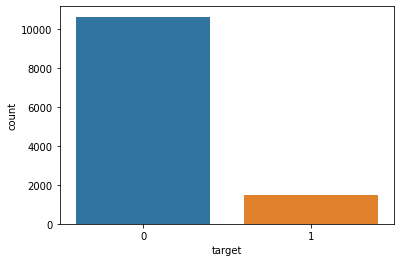

In [595]:
sns.countplot(train.target)

The dataset is is skewed towards class 0, consider balancing the dataset 

In [596]:
print("Are There Missing value in train? :",train.isnull().any().any())
print((train.isnull().sum()/train.shape[0])*100)

Are There Missing value in train? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     2.972100
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              30.946270
Subject_Car_Colour        57.637222
Subject_Car_Make          20.498386
LGA_Name                  53.613710
State                     53.713056
ProductName                0.000000
target                     0.000000
ProductName_count          0.000000
dtype: float64


In [597]:
print("Are There Missing value in test? :",test.isnull().any().any())
print((test.isnull().sum()/test.shape[0])*100)

Are There Missing value in test? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     3.013328
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              31.639946
Subject_Car_Colour        58.045200
Subject_Car_Make          20.494495
LGA_Name                  53.737686
State                     53.853583
ProductName                0.000000
ProductName_count          0.000000
dtype: float64


Remember to handle the missing values 

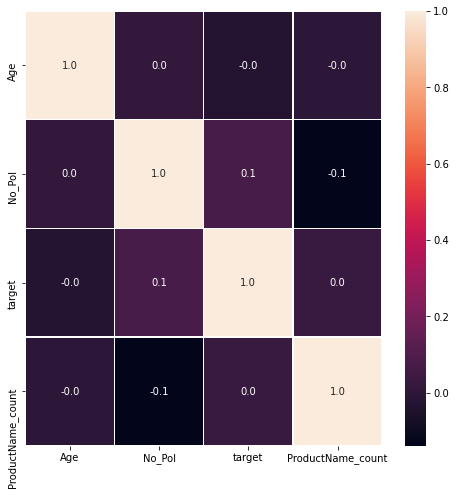

In [598]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(train.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

### Correlation might not be a best measure for this dataset since there are more categorical features

In [599]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0


In [600]:
def check_categorical_relationship(cat_col,y_col,df):
    for feat in cat_col:
        plt.figure(figsize=(20,5))
        sns.barplot(df[feat],df[y_col])
        plt.show()
        print("\n \n \n ")

In [601]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', nan, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

# Basic Data preprocessing 

In [602]:
train.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'ProductName_count'],
      dtype='object')

### fill mising value

In [603]:
all_data = all_data.fillna(9999)
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,9999,9999,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,9999,9999,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,9999,9999,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,9999,9999,9999,9999,9999,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,9999,9999,9999,Lagos,Lagos,Muuve,1.0


In [604]:
print("Are There still Missing value in data? :",all_data.isnull().any().any())
print((all_data.isnull().sum()/all_data.shape[0])*100)

Are There still Missing value in data? : False
ID                        0.0
Policy Start Date         0.0
Policy End Date           0.0
Gender                    0.0
Age                       0.0
First Transaction Date    0.0
No_Pol                    0.0
Car_Category              0.0
Subject_Car_Colour        0.0
Subject_Car_Make          0.0
LGA_Name                  0.0
State                     0.0
ProductName               0.0
target                    0.0
dtype: float64


### date features

In [605]:
date_col

['Policy Start Date', 'Policy End Date', 'First Transaction Date']

In [606]:
for feat in date_col:
    all_data[feat] = pd.to_datetime(all_data[feat])

In [607]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      17256 non-null  object        
 1   Policy Start Date       17256 non-null  datetime64[ns]
 2   Policy End Date         17256 non-null  datetime64[ns]
 3   Gender                  17256 non-null  object        
 4   Age                     17256 non-null  int64         
 5   First Transaction Date  17256 non-null  datetime64[ns]
 6   No_Pol                  17256 non-null  int64         
 7   Car_Category            17256 non-null  object        
 8   Subject_Car_Colour      17256 non-null  object        
 9   Subject_Car_Make        17256 non-null  object        
 10  LGA_Name                17256 non-null  object        
 11  State                   17256 non-null  object        
 12  ProductName             17256 non-null  object

In [608]:
from datetime import date

In [609]:
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.quarter
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
       # df[feat +'_quarter'] = df[feat].dt.quarter
    df.drop(columns=date_col,axis=1,inplace=True)


In [610]:
extract_date_info(all_data,date_col)

In [611]:
all_data

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy End Date_year,Policy End Date_day,Policy End Date_month,First Transaction Date_year,First Transaction Date_day,First Transaction Date_month
0,0040R73,Male,30,1,Saloon,Black,TOYOTA,9999,9999,Car Classic,0.0,2,14,5,2,13,5,2,14,5
1,0046BNK,Female,79,1,JEEP,Grey,TOYOTA,9999,9999,Car Classic,1.0,4,29,11,4,28,11,4,29,11
2,005QMC3,Male,43,1,Saloon,Red,TOYOTA,9999,9999,Car Classic,0.0,1,21,3,1,20,3,1,21,3
3,0079OHW,Male,2,1,9999,9999,9999,9999,9999,CarSafe,0.0,3,21,8,3,20,8,3,21,8
4,00BRP63,Entity,20,3,9999,9999,9999,Lagos,Lagos,Muuve,1.0,3,29,8,4,31,12,3,29,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17251,ZYXX5AF,Male,48,1,Saloon,9999,Honda,9999,9999,CarSafe,9999.0,3,18,7,3,17,7,3,18,7
17252,ZYYOZ5L,9999,50,1,9999,9999,9999,Victoria Island,Lagos,Car Classic,9999.0,4,4,12,4,3,12,4,4,12
17253,ZZ1GTKD,Male,1,1,9999,9999,9999,9999,9999,CarSafe,9999.0,3,24,9,3,23,9,3,24,9
17254,ZZDXQSI,Female,52,1,Saloon,Grey,TOYOTA,9999,9999,Car Classic,9999.0,3,17,7,3,16,7,3,17,7


In [612]:
mode=all_data.Age.mean()

In [613]:
all_data.Gender.value_counts()

Male            10888
Female           4735
9999              515
Entity            413
Joint Gender      306
NOT STATED        244
NO GENDER         101
SEX                54
Name: Gender, dtype: int64

In [614]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', 9999, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

In [615]:
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O',9999:'O','NO GENDER':'O','NOT STATED':'O','SEX':'O','rare':0 }

In [616]:
all_data.Gender = all_data.Gender.map(mapper)

In [617]:
all_data.Gender.unique()

array(['M', 'F', 'O'], dtype=object)

In [618]:
al_data=pd.get_dummies(all_data,columns=cat_col)

# Creat Base model 

In [619]:
all_data.target = all_data.target.astype(int)
al_data.target = al_data.target.astype(int)

In [620]:
#all_data.drop(columns=['ID'],inplace=True)
al_data.drop(columns=['ID'],inplace=True)

In [621]:
#Get the new dataset
train_n = al_data[:ntrain]
test_n = al_data[ntrain:]

In [622]:
test_n.drop("target",axis = 1,inplace = True)

In [623]:
X= train_n.drop(columns=['target'])
y= train_n.target

In [624]:
!pip install lightgbm

In [625]:
import lightgbm as lgb   
model = lgb.LGBMClassifier(random_state=42,n_estimators=1000,silent=False,
                           scale_pos_weight= 3,colsample_bylevel=0.8,subsample=0.8)  #9
model.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bylevel=0.8,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=3, silent=False, subsample=0.8,
               subsample_for_bin=200000, subsample_freq=0)

In [626]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X.columns})
fea_imp.sort_values(by='imp',ascending=False,inplace=True)
fea_imp.head(30)

,imp,col
0,5767,Age
5,3449,Policy End Date_day
2,3319,Policy Start Date_day
3,1771,Policy Start Date_month
6,1529,Policy End Date_month
1,814,Policy Start Date_year
154,681,Subject_Car_Make_TOYOTA
4,656,Policy End Date_year
11,602,Gender_M
38,575,Subject_Car_Colour_9999


In [627]:
index_to_use_later = test['ID'].values

In [628]:
cols=list(X.columns)
output= model.predict_proba(test_n[cols])

In [629]:
submission_df = pd.DataFrame(columns=['ID','target'])    
submission_df['ID'] = index_to_use_later
submission_df['target'] = output[:,1]

In [630]:
submission_df['target']=np.where(submission_df['target'] > 0.5,1,0)

In [631]:
submission_df.to_csv('lgbm_poswt3.csv',index=False)

In [632]:
submission_df.head()

,ID,target
0,009D84L,1
1,01DO2EQ,1
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,1


In [633]:
submission_df.target.value_counts()

0    4363
1     814
Name: target, dtype: int64

- Deep EDA and domain knowledge sourcing
- Re-group Categorical features 
- Feature Engineering 
- Dataset balancing
- Hyperparameter tunning with gridsearch
- Ensembling of models 
- Cross-validation to avoid over fitting and under-fitting

In [634]:
!pip install bayesian-optimization

#Hyperparameter tunning with Bayesian Optimization:

In [635]:
from bayes_opt import BayesianOptimization
from sklearn import metrics
from sklearn.metrics import mean_squared_error,log_loss
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [636]:
def bayesion_opt_lgbm(X,y, init_iter=3, n_iters=7, random_state= 42, seed = 42, num_iterations = 100):
      dtrain = lgb.Dataset(data=X, label=y)

def lgb_logloss(preds, dtrain):
      labels = dtrain.get_label()
      return 'lgb_logloss', lgb_logloss(labels, preds), True

  # Objective Function
def hyp_lgbm(num_leaves, feature_fraction,colsample_bylevel,subsample, bagging_fraction, max_depth, min_split_gain, min_child_weight):
        
          params = {'application':'binary','num_iterations': num_iterations,
                    'learning_rate':0.05, 'early_stopping_round':50,
                    'metric':'lgb_binary_logloss'} # Default parameters
          params["num_leaves"] = int(round(num_leaves))
          params['feature_fraction'] = max(min(feature_fraction, 1), 0)
          params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
          params['colsample_bylevel'] = max(min(colsample_bylevel, 1), 0)
          params['subsample'] = max(min(subsample, 1), 0)
          params['max_depth'] = int(round(max_depth))
          params['min_split_gain'] = min_split_gain
          params['min_child_weight'] = min_child_weight
          cv_results = lgb.cv(params, dtrain, nfold=5, seed=seed,categorical_feature=[], stratified=False,
                              verbose_eval =None, feval=lgb_logloss)
          # print(cv_results)
          return np.max(cv_results['binary_logloss-mean'])

  # Domain space-- Range of hyperparameters 
pds = {'num_leaves': (65, 100),
            'feature_fraction': (0.1, 1),
            'bagging_fraction': (0.1, 1),
            'colsample_bylevel': (0.1, 1),
            'subsample': (0.1, 1),
            'max_depth': (4, 10),
            'min_split_gain': (0.01, 0.08),
            'min_child_weight': (5, 20)
            }

  # Surrogate model
optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=42)
                                    
  # Optimize
#optimizer.maximize(init_points=init_iter, n_iter=n_iters)

bayesion_opt_lgbm(X,y, init_iter=4, n_iters=15, 
                  random_state=42, seed = 142, num_iterations = 5000)